In [68]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
# Load the dataset 
df = pd.read_csv("house_prices.csv")

# Show the first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,N,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,N,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,N,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,N,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,N,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [72]:
# Data cleaning – Drop rows with missing values for selected features
features = ['sqft_living', 'bedrooms', 'bathrooms', 'floors']
df = df.dropna(subset=features + ['price'])


In [74]:
# Prepare input features (X) and target (y)
X = df[features]
y = df['price']

In [76]:
# Train the regression model
# This is where I trained my regression model. It learns from the dataset by finding the mathematical relationship 
# between input features (like house size) and the target (price). After this, the model is ready to predict prices for new houses.
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [78]:
# Predict house price for a new example
example = pd.DataFrame([[2000, 3, 2, 1]], columns=features)
predicted_price = model.predict(example)[0]

print(f"Predicted price: £{predicted_price:,.2f}")


Predicted price: £535,819.78


In [80]:
# Evaluate the model
y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score: {r2:.2f}")
print(f"Mean Squared Error: {mse:,.0f}")

R² Score: 0.51
Mean Squared Error: 66,455,438,852


In [82]:
# Create a DataFrame to compare actual vs predicted values
comparison = pd.DataFrame({
    "Actual": y[:10],
    "Predicted": y_pred[:10]
})

# Format the currency output
comparison.style.format({
    "Actual": "£{:,.2f}",
    "Predicted": "£{:,.2f}"
})


,Actual,Predicted
0,"£221,900.00","£274,263.81"
1,"£538,000.00","£714,337.80"
2,"£180,000.00","£205,260.55"
3,"£604,000.00","£473,449.61"
4,"£510,000.00","£436,813.95"
5,"£1,225,000.00","£1,555,730.47"
6,"£257,500.00","£449,806.59"
7,"£291,850.00","£241,063.38"
8,"£229,500.00","£459,899.75"
9,"£323,000.00","£505,913.78"


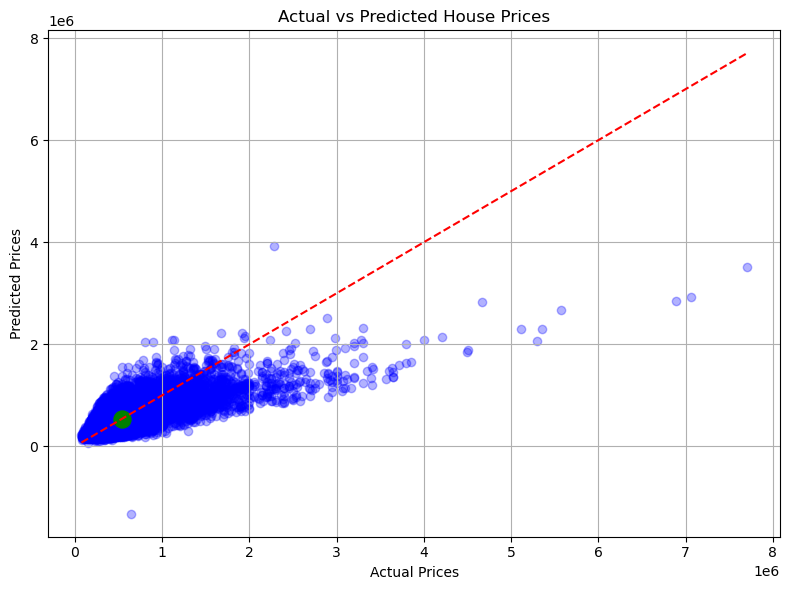

Predicted price: £535,819.78


In [84]:
#  9. Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.3, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# 🟢 Add green dot for a specific prediction
# You already created this earlier:
example = pd.DataFrame([[2000, 3, 2, 1]], columns=features)
predicted_price = model.predict(example)[0]

# Place it on the graph
plt.scatter(predicted_price, predicted_price, color='green', s=150,
            label=f"Predicted Example (£{predicted_price:,.0f})")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Predicted price: £{predicted_price:,.2f}")